In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt
import pandas as pd


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.economic_model import EconomicModel
from simulation_engine.core.validator_config import ValidatorConfig
from simulation_engine.core.network_architecture_model import NetworkArchitectureModel
from simulation_engine.core.security_model import SecurityModel
from simulation_engine.engine.sim_engine import SimulationEngine
from simulation_engine.utils.visualization import plot_results



BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../examples'))

# Function to load configuration files
def load_config_file(filename):
    return ConfigManager.load_config(os.path.join(BASE_DIR, filename))

# Load all configurations
econ_config = load_config_file('example_economic_model.json')
sec_config = load_config_file('example_security_model.json')
val_config = load_config_file('example_validator_config.json')
net_config = load_config_file('example_network_architecture_config.json')

# Initialize models with configurations
economic_model = EconomicModel(
    econ_config['total_supply'], 
    econ_config['initial_distribution'], 
    econ_config['fee_rate'],
    econ_config['transaction_volume'],
    econ_config['staking_rewards'],
    econ_config['lock_up_periods']
)

security_model = SecurityModel(sec_config['slashing_conditions'])

validator_config = ValidatorConfig(
    val_config['criteria'],
    val_config['min_stake'],
    val_config['staking_token'],
    val_config['reward_mechanisms'],
    val_config['performance_metrics'],
    val_config['penalty_mechanisms']  # Add penalty mechanisms here
)
network_model = NetworkArchitectureModel(
    net_config['transaction_throughput_params'],
    net_config['block_size_params'],
    net_config['consensus_params'],
    net_config['latency_params'],
    net_config['topology_params'],
    net_config['fault_tolerance_params']
)

# Run simulations
#economics = economic_model.simulate_economics()
#security = security_model.simulate_security()
#validators = validator_config.simulate_validator_config()
#network_architecture = network_model.simulate_network_architecture()
#eval_metrics = EvaluateMetrics(economic_model, security_model, validator_config, network_model)

#simulation_engine = SimulationEngine(eval_metrics, time_steps=365)
#simulation_engine.run()

In [2]:
# Simulate for different inflation and deflation rates
inflation_rates = [0.01, 0.02, 0.03]  # Different inflation rates: 1%, 2%, 3%
deflation_rates = [0.005, 0.01, 0.015]  # Different deflation rates: 0.5%, 1%, 1.5%

# Collect results for each combination of inflation and deflation
all_results = {}

for inflation_rate in inflation_rates:
    for deflation_rate in deflation_rates:
        simulation_results = economic_model.run_simulation(
            inflation_rate=inflation_rate,
            deflation_rate=deflation_rate,
            conversion_rate=0.1,
            secondary_token_supply=500000,
            periods=12  # Simulating for 12 periods
        )
        key = f"Inflation: {inflation_rate}, Deflation: {deflation_rate}"
        all_results[key] = simulation_results

# Example: Printing results for one scenario
scenario = list(all_results.keys())[0]
print(f"Results for {scenario}:")
print(all_results[scenario][0])  # Print the results of the first period

Results for Inflation: 0.01, Deflation: 0.005:
{'period': 1, 'transaction_volume': 101528.81534926404, 'current_supply': 100504490.5012578, 'fees_collected': 1015.2881534926404, 'token_burned': 507.6440767463202, 'staking_rewards': {'short_term': 0.01425, 'medium_term': 0.171, 'long_term': 0.520125}, 'total_rewards': 0.705375, 'inflation_tokens': 999994.9306129825, 'deflation_tokens': 499997.46530649124, 'primary_to_secondary': 10084.905510242606, 'secondary_token_supply': 489915.0944897574, 'economic_scenarios': {'high_volume': 152293.22302389605, 'low_volume': 50764.40767463202, 'validator_exit': 10000000.0}, 'token_value': 0.9949804183002998}


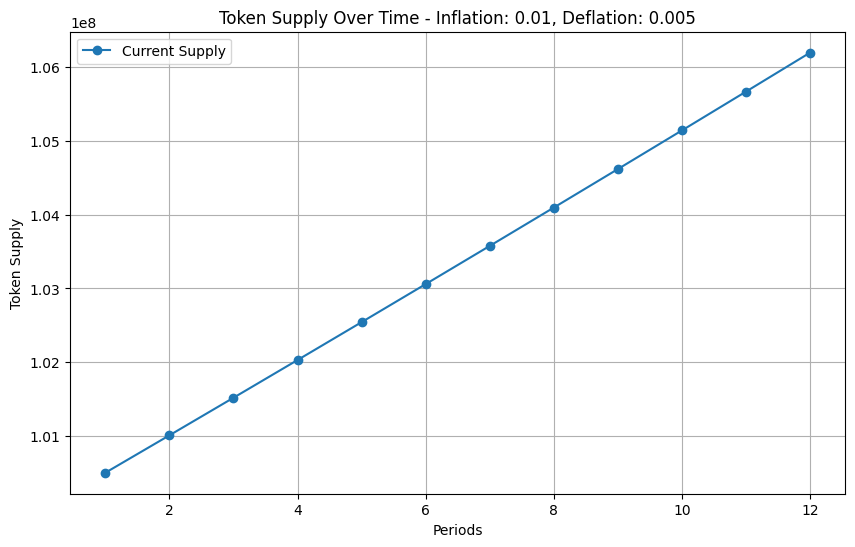

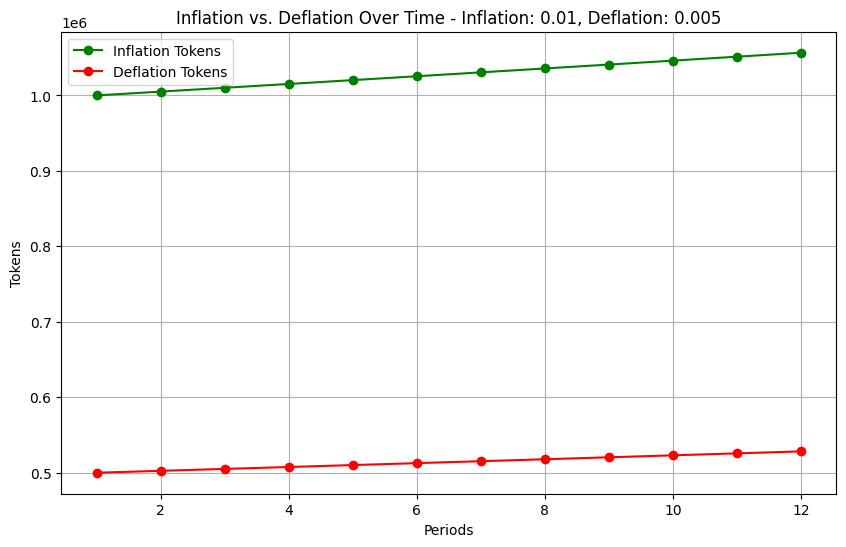

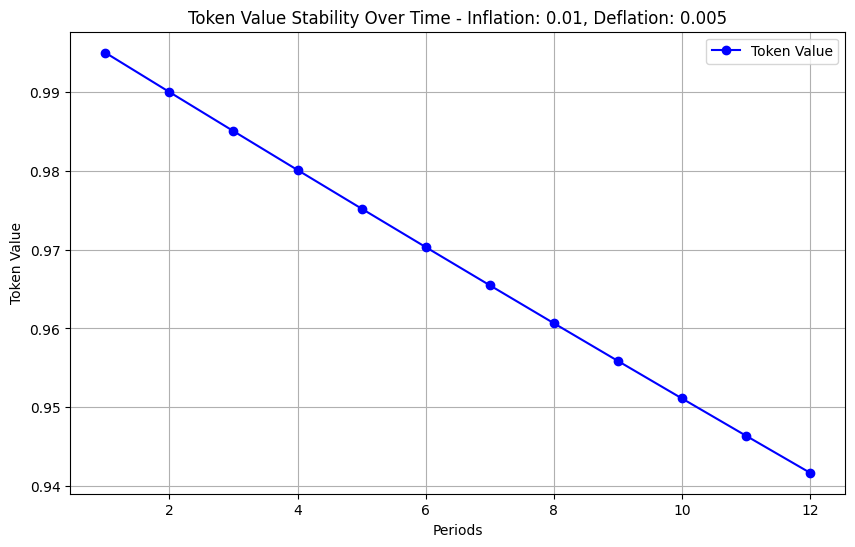

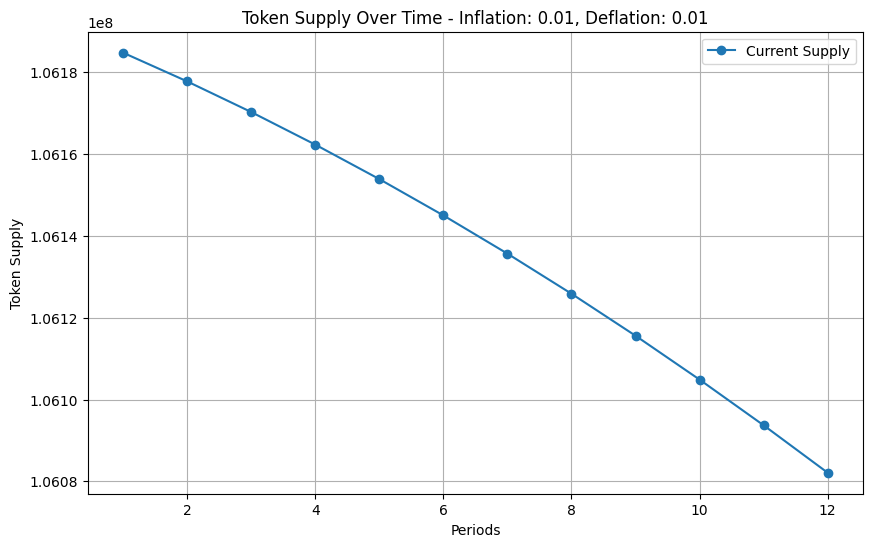

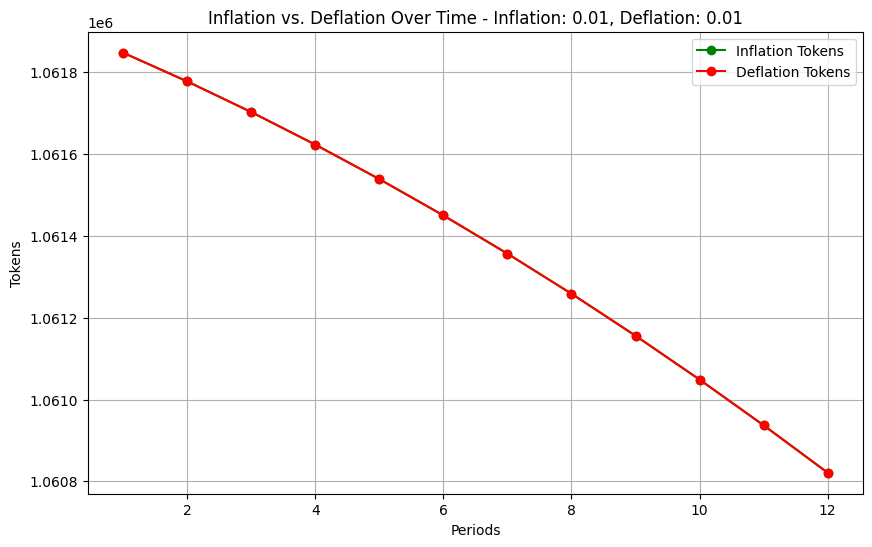

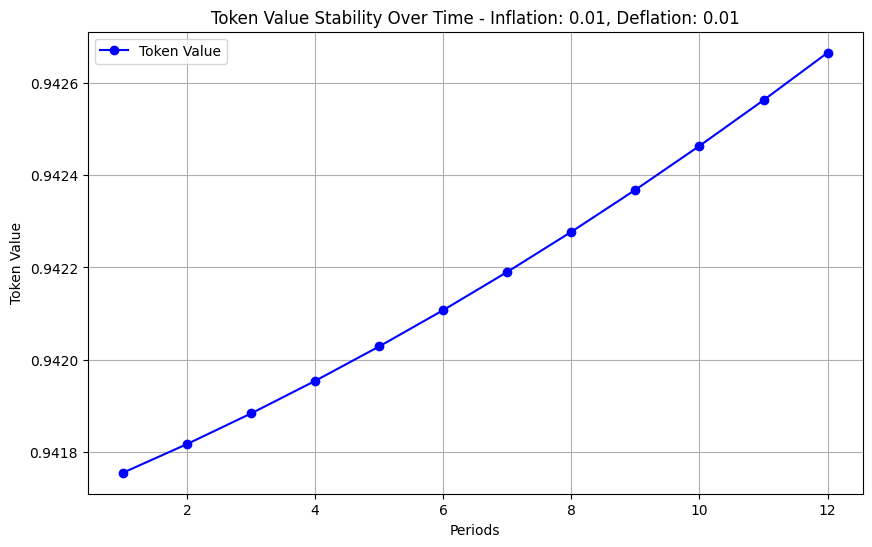

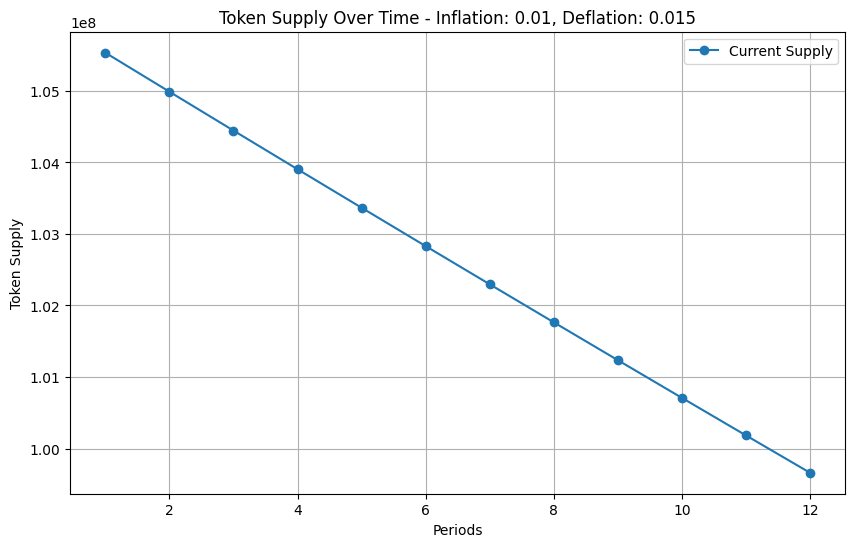

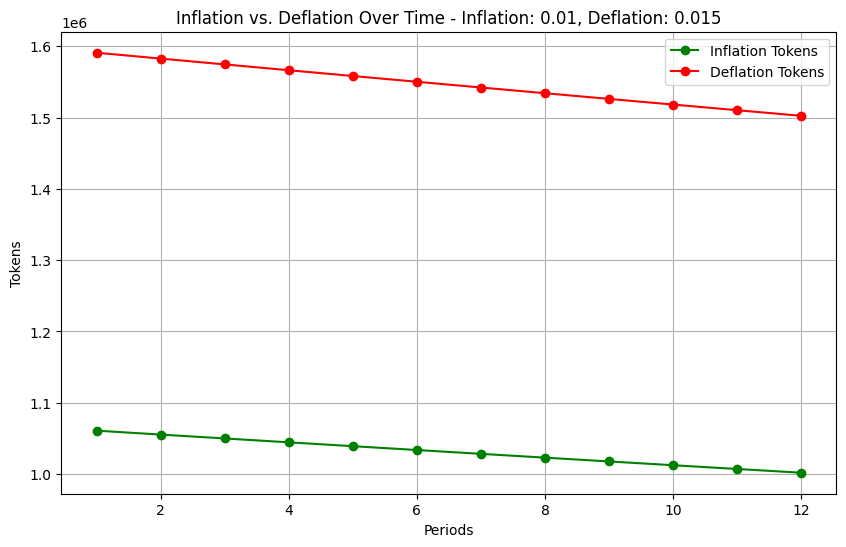

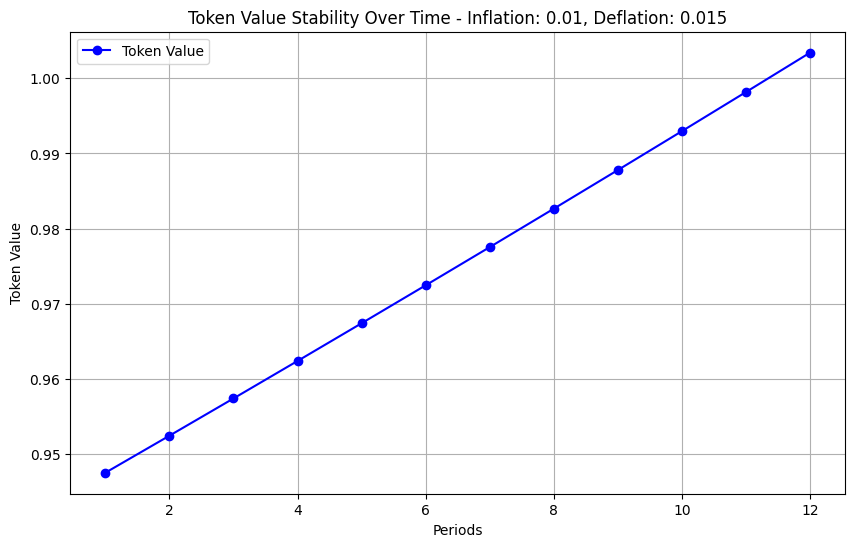

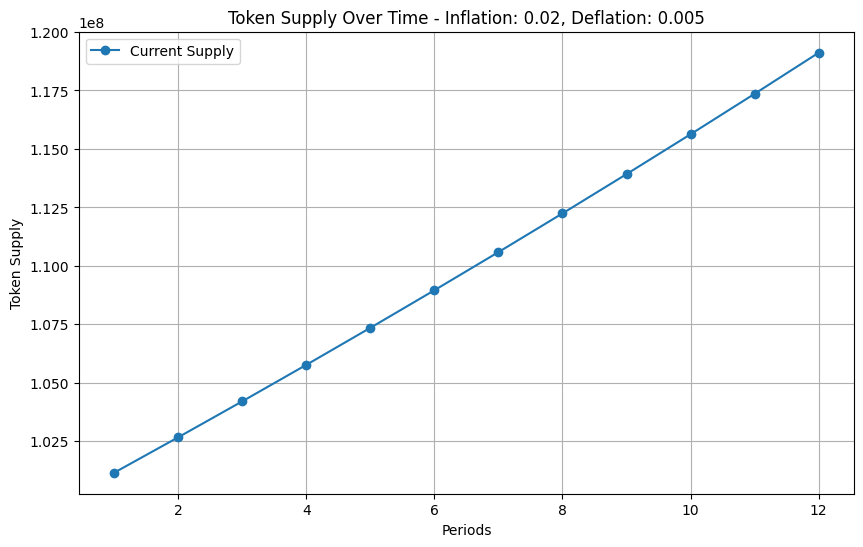

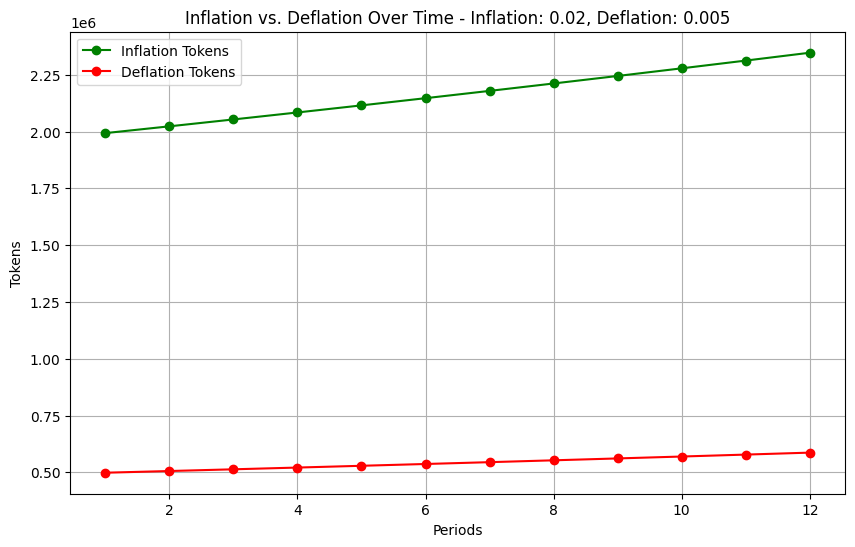

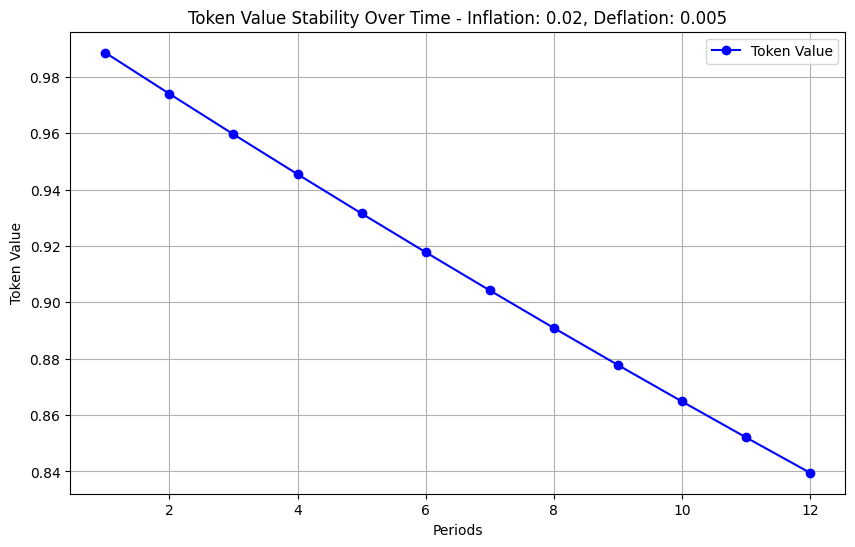

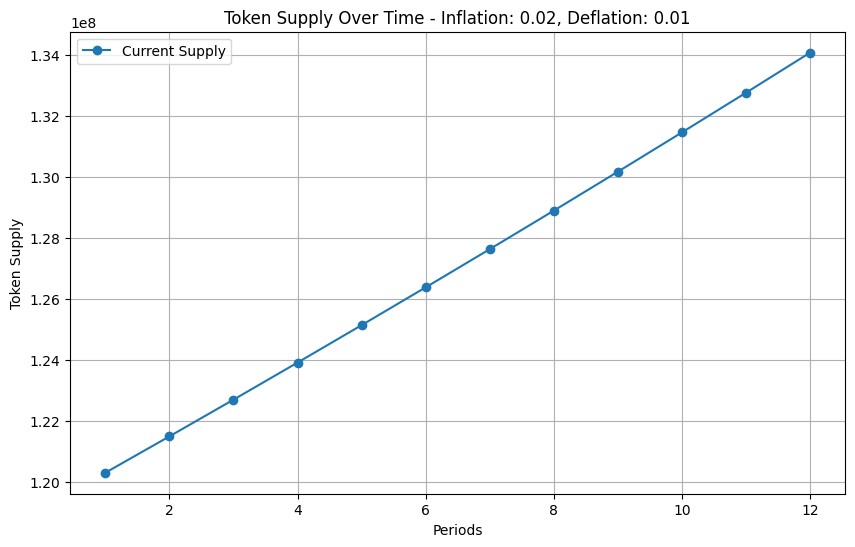

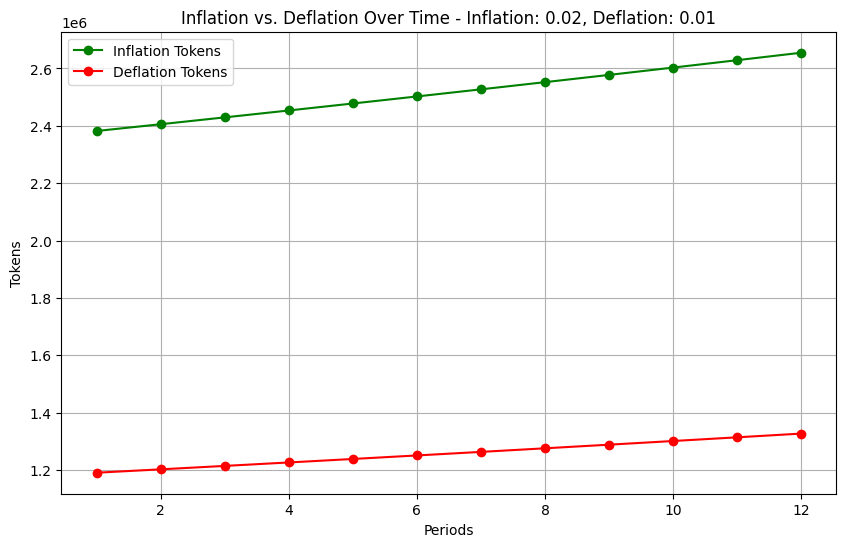

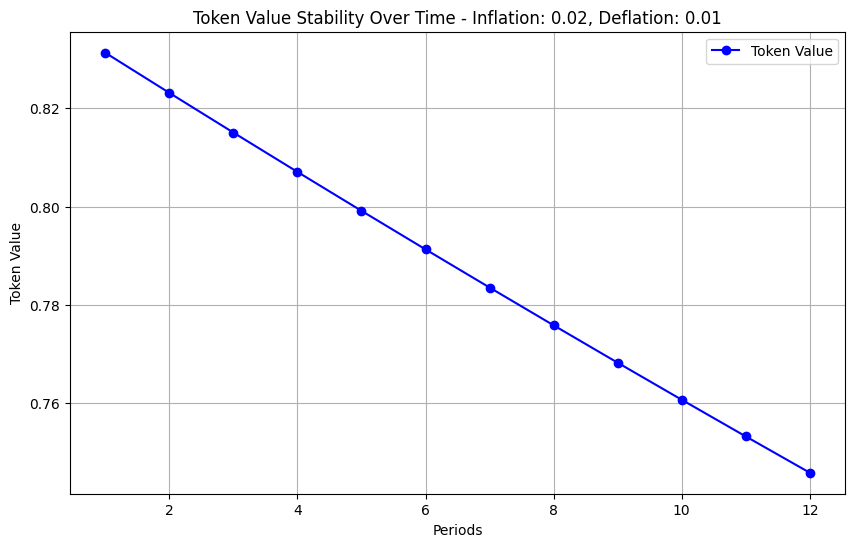

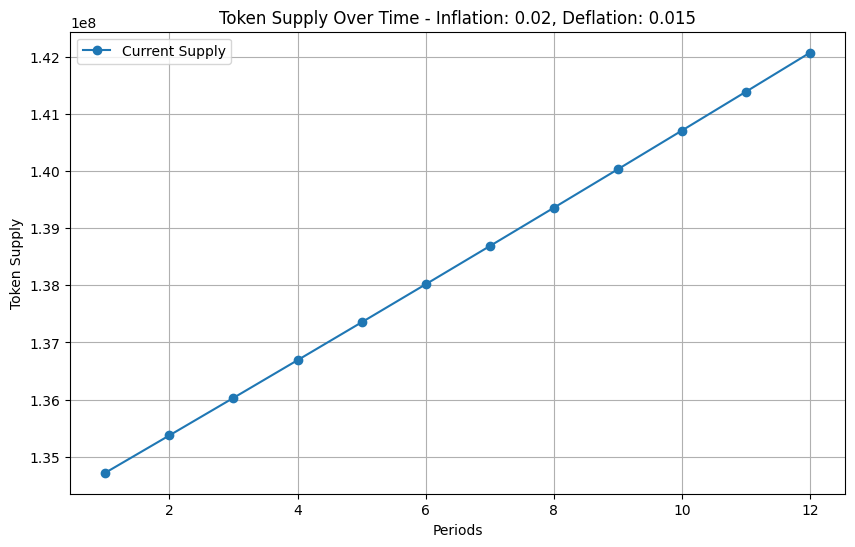

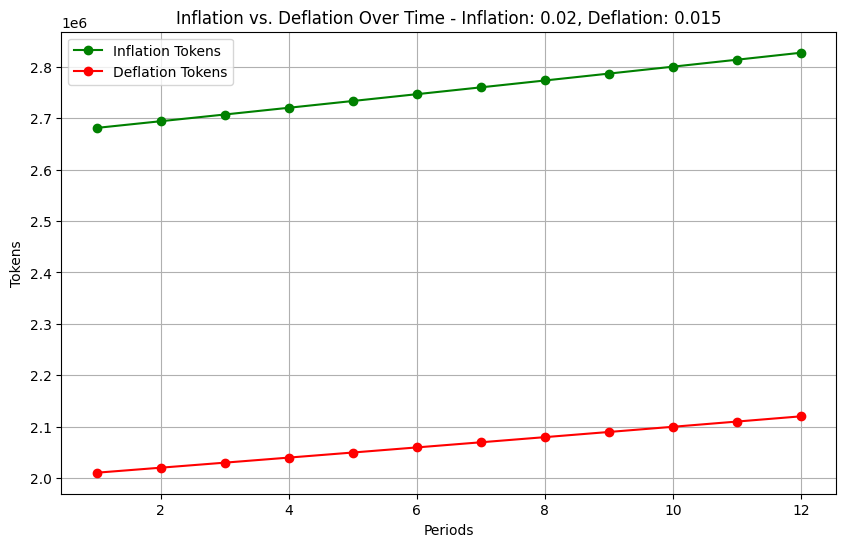

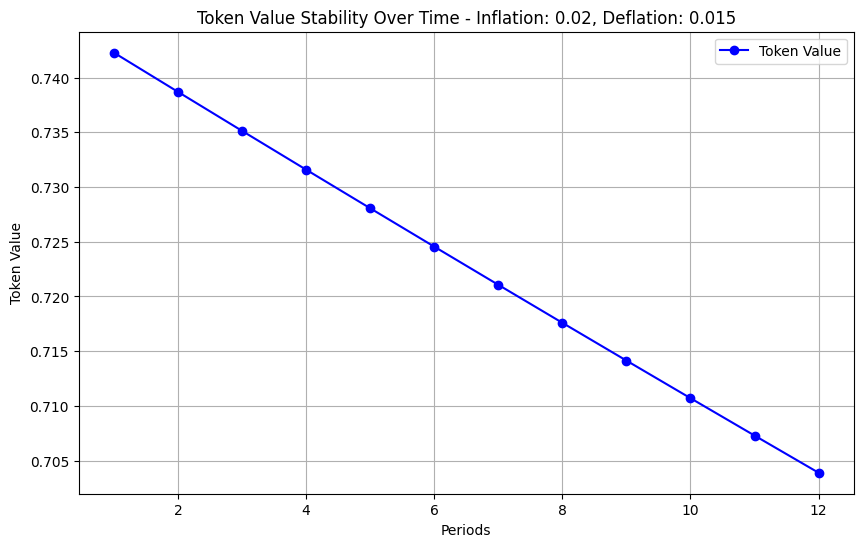

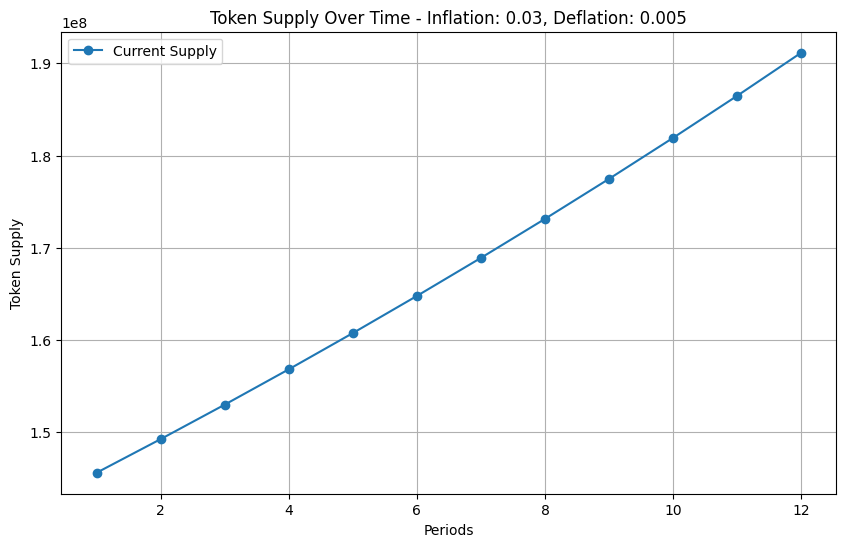

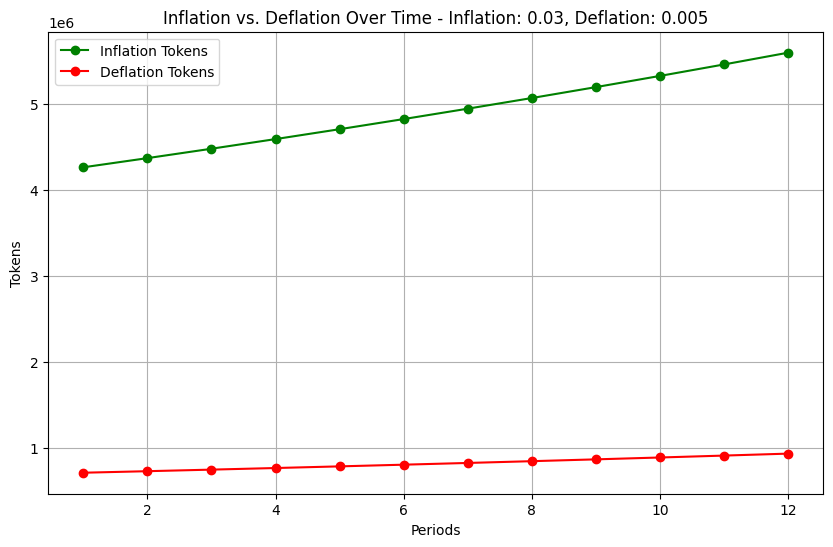

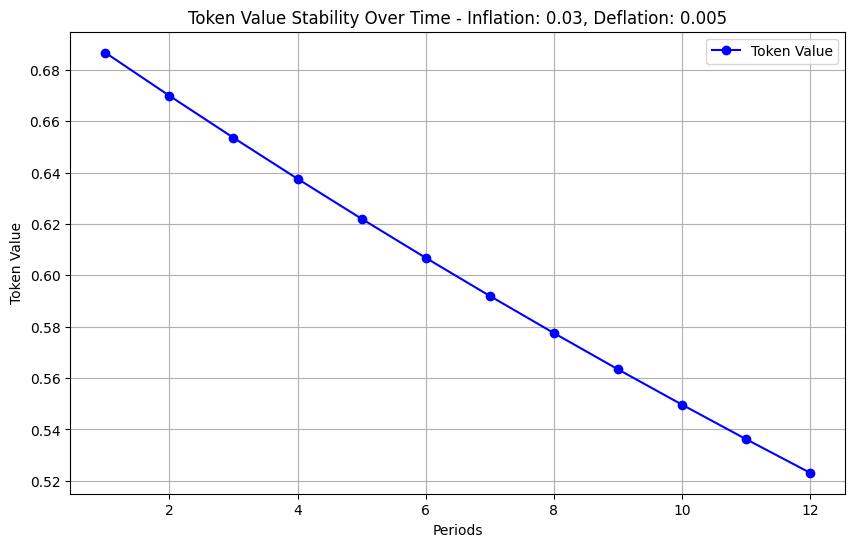

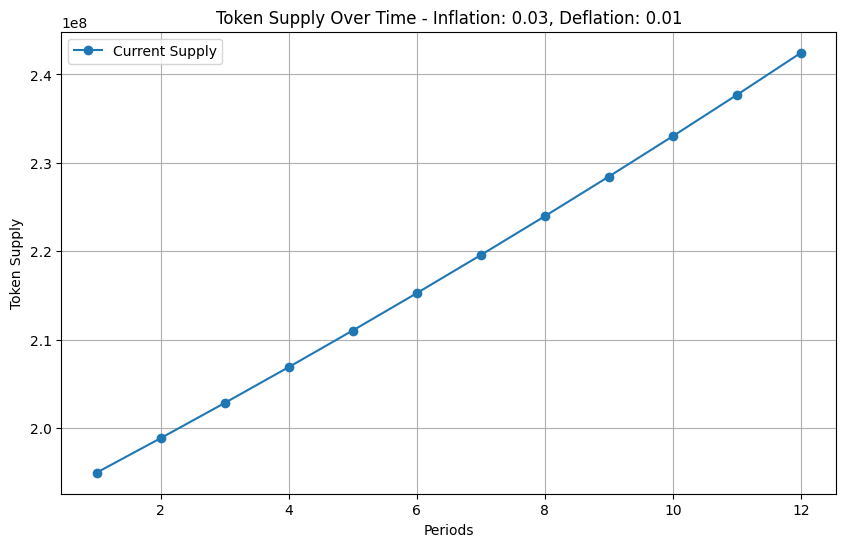

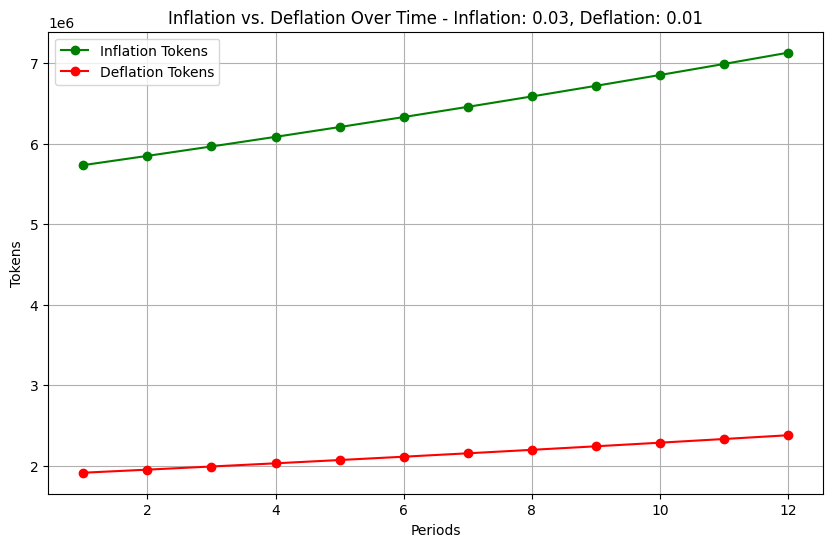

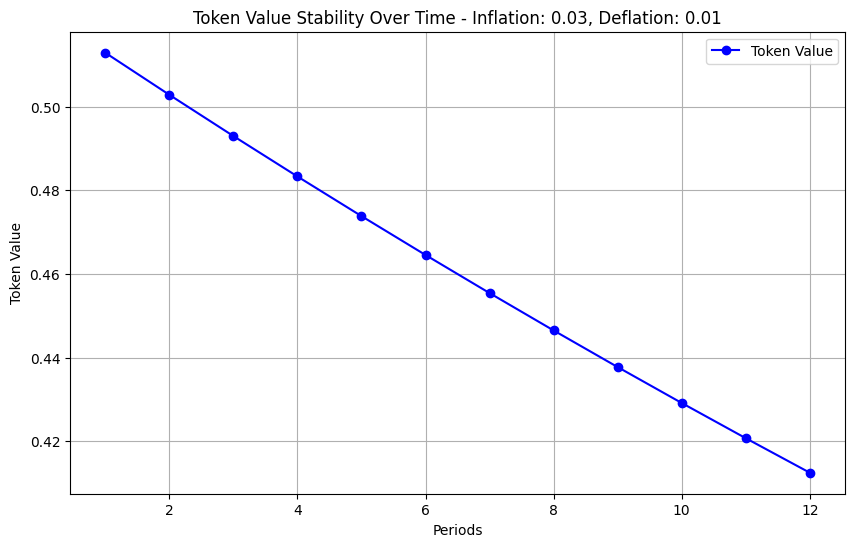

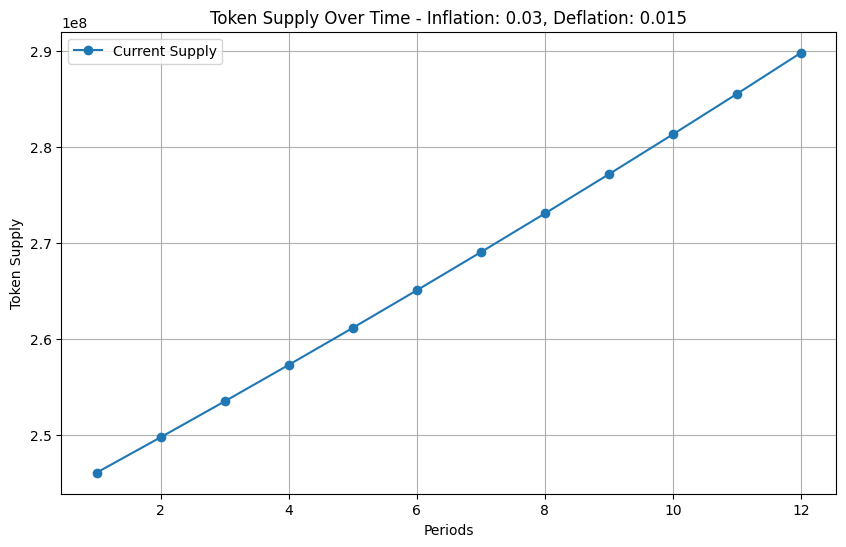

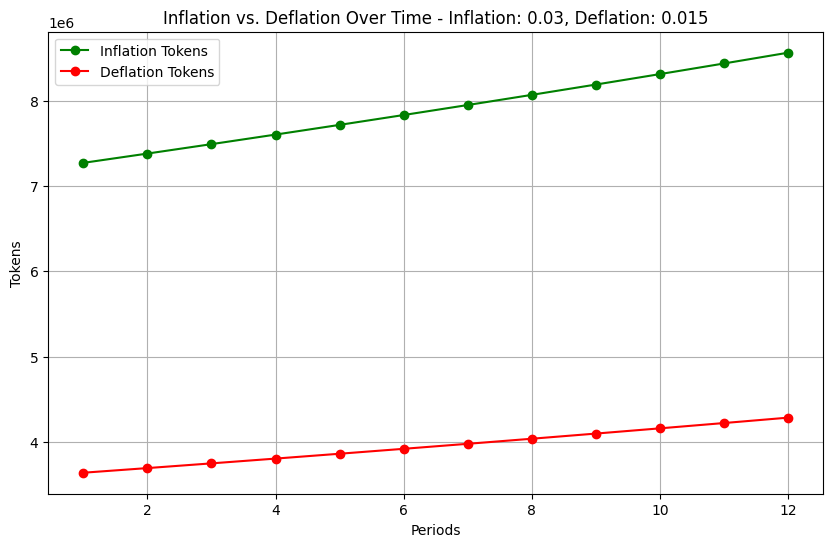

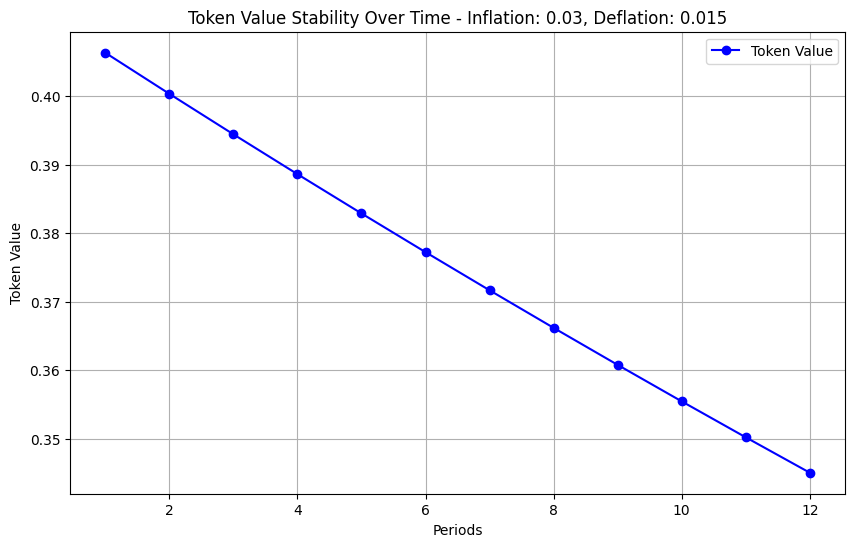

In [3]:
import matplotlib.pyplot as plt

# Function to plot the simulation results for inflation vs. deflation scenarios
def plot_inflation_deflation_experiment(all_results):
    periods = range(1, 13)  # We are simulating for 12 periods

    # Prepare the data for plotting
    for scenario, results in all_results.items():
        # Extract relevant metrics over periods
        current_supply = [res['current_supply'] for res in results]
        inflation_tokens = [res['inflation_tokens'] for res in results]
        deflation_tokens = [res['deflation_tokens'] for res in results]
        token_value = [res['token_value'] for res in results]
        
        # Plot Current Supply over Periods
        plt.figure(figsize=(10, 6))
        plt.plot(periods, current_supply, label='Current Supply', marker='o')
        plt.xlabel('Periods')
        plt.ylabel('Token Supply')
        plt.title(f"Token Supply Over Time - {scenario}")
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plot Inflation and Deflation Tokens over Periods
        plt.figure(figsize=(10, 6))
        plt.plot(periods, inflation_tokens, label='Inflation Tokens', marker='o', color='g')
        plt.plot(periods, deflation_tokens, label='Deflation Tokens', marker='o', color='r')
        plt.xlabel('Periods')
        plt.ylabel('Tokens')
        plt.title(f"Inflation vs. Deflation Over Time - {scenario}")
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plot Token Value Stability over Periods
        plt.figure(figsize=(10, 6))
        plt.plot(periods, token_value, label='Token Value', marker='o', color='b')
        plt.xlabel('Periods')
        plt.ylabel('Token Value')
        plt.title(f"Token Value Stability Over Time - {scenario}")
        plt.grid(True)
        plt.legend()
        plt.show()

# Assume 'all_results' has been populated with simulation data
plot_inflation_deflation_experiment(all_results)
